https://pythonhosted.org/pyserial/shortintro.html#opening-serial-ports

Have a PMS5003 connected via serial adapter

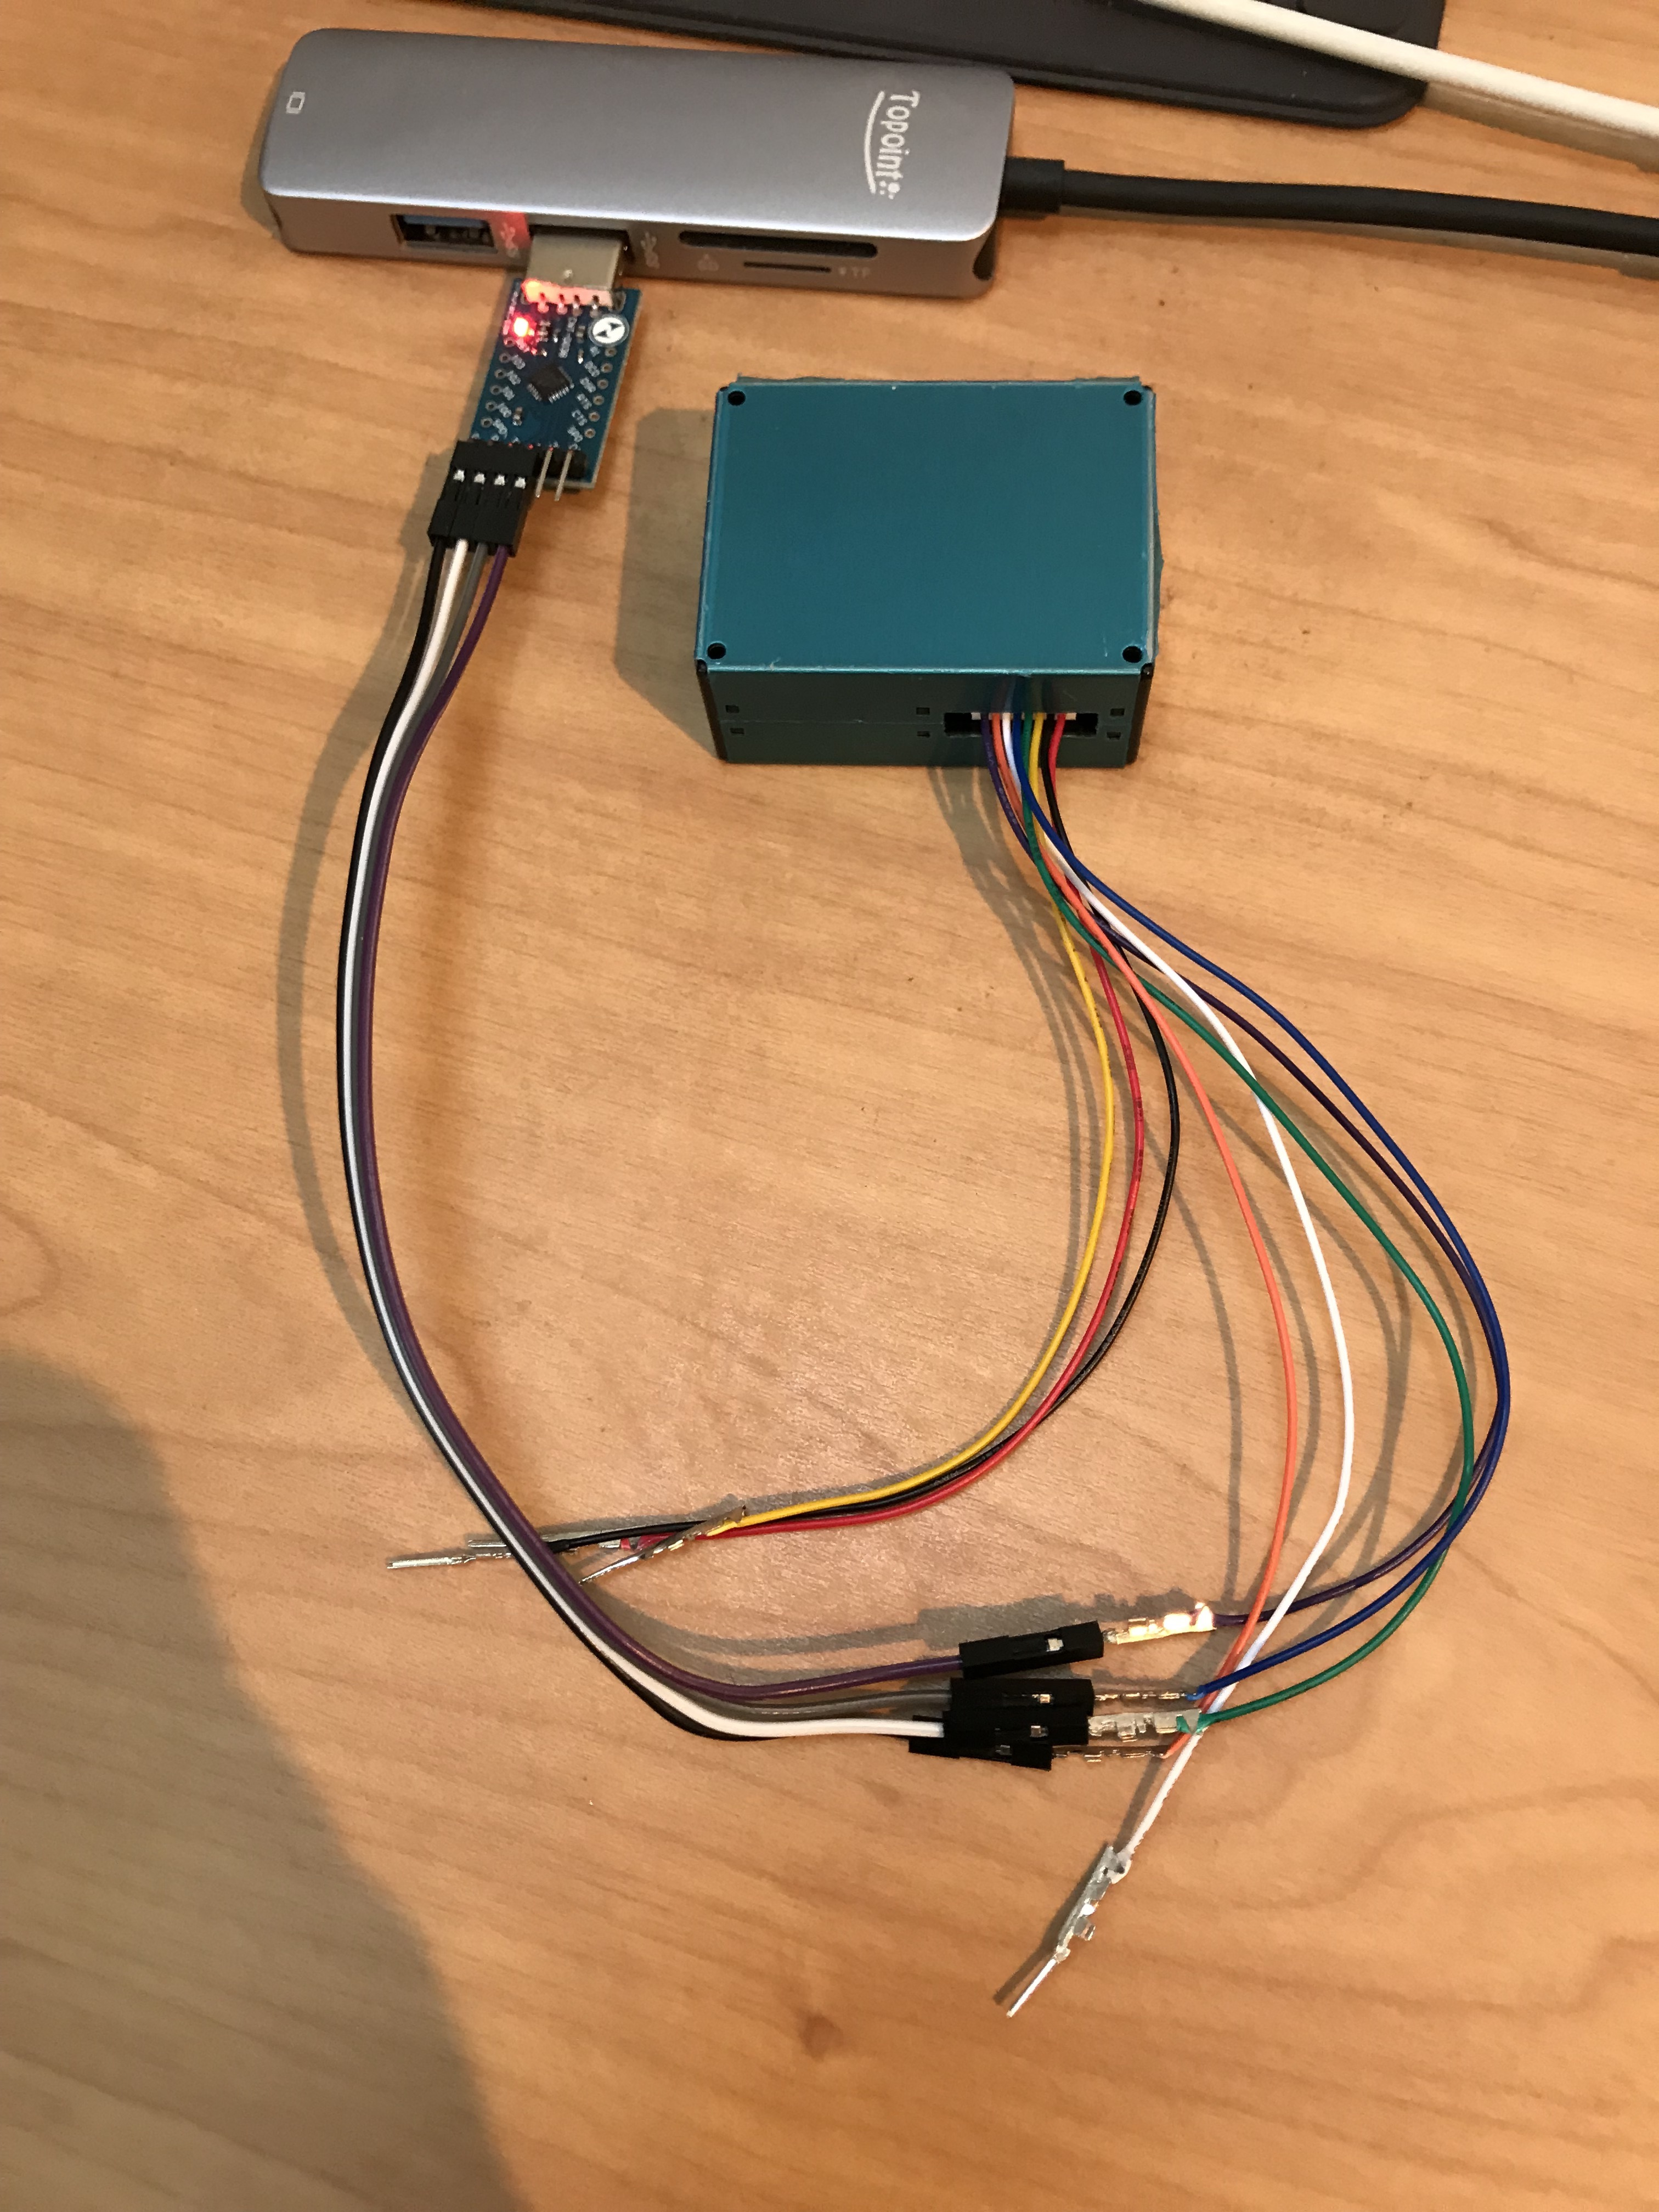

In [1]:
from IPython.display import Image
Image("serial.JPG")

Use `ls /dev/tty/.*` to check port

In [6]:
import serial

In [20]:
port = '/dev/tty.SLAB_USBtoUART'

In [8]:
ser = serial.Serial(port)

In [9]:
ser.name

'/dev/tty.SLAB_USBtoUART'

In [12]:
ser.baudrate = 9600

In [13]:
line = ser.readline()

In [14]:
line

b'2\x02\xf3\x00J\x00\x08\x00\x04\x00\x01\x93\x00\x03,BM\x00\x1c\x00\x0e\x00\x11\x00\x14\x00\x0e\x00\x11\x00\x14\n'

Lets use [the following class](https://github.com/Thomas-Tsai/pms3003-g3/blob/master/g3.py) to decode the data

In [79]:
class g3sensor():
    def __init__(self, device, print_data=False):
        print(device)
        self.serial = serial.Serial(device, baudrate=9600)
        self.print_data = print_data

    def read_data(self):
        self.data = self.serial.read(22)
        data_hex = self.data.hex()
        pm1_cf=int(data_hex[4]+data_hex[5]+data_hex[6]+data_hex[7],16)
        pm25_cf=int(data_hex[8]+data_hex[9]+data_hex[10]+data_hex[11],16)
        pm10_cf=int(data_hex[12]+data_hex[13]+data_hex[14]+data_hex[15],16)
        pm1=int(data_hex[16]+data_hex[17]+data_hex[18]+data_hex[19],16)
        pm25=int(data_hex[20]+data_hex[21]+data_hex[22]+data_hex[23],16)
        pm10=int(data_hex[24]+data_hex[25]+data_hex[26]+data_hex[27],16)
        data = [pm1_cf, pm10_cf, pm25_cf, pm1, pm10, pm25]
        
        if self.print_data:
            print("pm1_cf: "+str(pm1_cf))
            print("pm25_cf: "+str(pm25_cf))
            print("pm10_cf: "+str(pm10_cf))
            print("pm1: "+str(pm1))
            print("pm25: "+str(pm25))
            print("pm10: "+str(pm10))
        
        #self.serial.close()
        return pm10

In [87]:
sensor = g3sensor(port, print_data=False)

/dev/tty.SLAB_USBtoUART


In [88]:
sensor.read_data()

4352

In [89]:
import time

In [90]:
data_pm10 = []
measurements = 5

for i in range(measurements):
    data_pm10.append(sensor.read_data())
    time.sleep(2)

print(data_pm10)

[7168, 512, 4873, 3584, 403]
